In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [206]:
df = pd.read_csv('financial_regression.csv')

In [207]:
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [208]:
df.tail()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
3899,2024-10-17,585.91,586.1200,582.1600,582.35,34393714.0,3.9600,496.44,496.490,491.1901,...,96.0259,94.5400,95.68,52414.0,1.4859,247.75,249.06,247.62,248.63,5176170.0
3900,2024-10-18,584.07,585.3900,582.5800,584.59,37416801.0,2.8100,494.06,495.570,493.3000,...,99.6600,97.2700,99.46,205027.0,2.3900,250.00,251.37,249.90,251.27,7833614.0
3901,2024-10-21,583.85,584.8500,580.6001,583.63,36439010.0,4.2499,493.25,496.230,491.3100,...,98.3500,95.8900,97.35,227394.0,2.4600,252.74,253.14,250.73,251.22,9258590.0
3902,2024-10-22,581.05,584.5000,580.3800,583.32,34183835.0,4.1200,492.73,497.445,491.9700,...,99.5899,97.9600,99.41,136431.0,1.6299,253.06,253.94,252.52,253.93,5756321.0
3903,2024-10-23,581.26,581.7086,574.4150,577.99,47444991.0,7.2936,493.59,494.250,485.0500,...,98.5500,96.4643,97.53,81133.0,2.0857,253.08,253.18,250.20,250.87,7899995.0


In [209]:
df.describe()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.00000,3719.000000,...,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03
mean,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.022320,181.394495,182.689784,179.98249,181.431795,...,110.184473,107.931862,109.067990,7.169556e+04,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
std,121.374890,122.024860,120.663204,121.393684,6.902901e+07,2.656917,122.468973,123.393400,121.43517,122.473492,...,58.454170,56.877967,57.688191,9.790703e+04,2.543622,29.604259,29.754711,29.422517,29.611348,6.182342e+06
min,103.110000,103.420000,101.130000,102.200000,1.708170e+05,0.300000,42.670000,42.821500,41.55000,42.470000,...,40.550000,38.490000,40.090000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,169.715000,170.175000,169.030000,169.650000,6.699112e+07,1.280000,78.700000,79.150000,78.31500,78.730000,...,69.400000,68.270000,68.820000,2.085900e+04,0.870000,120.555000,121.030000,120.170000,120.590000,5.795310e+06
50%,241.180000,242.080000,239.450000,240.610000,9.239907e+07,2.090000,138.720000,139.420000,138.02000,139.050000,...,83.900000,82.650000,83.210000,3.829500e+04,1.414000,137.620000,138.140000,136.990000,137.710000,8.087993e+06
75%,374.455000,377.800000,371.045000,374.255000,1.367146e+08,3.815000,284.165000,287.590000,281.23000,284.835000,...,143.785000,140.480000,142.040000,8.420700e+04,2.680000,167.770000,168.412500,167.055000,167.835000,1.156729e+07
max,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.39000,502.960000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [211]:
df.isnull().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [212]:
df.isnull().sum().sum()

19308

In [213]:
df.duplicated().sum()

0

In [214]:
num_columns = df.select_dtypes(include=['float64']).columns

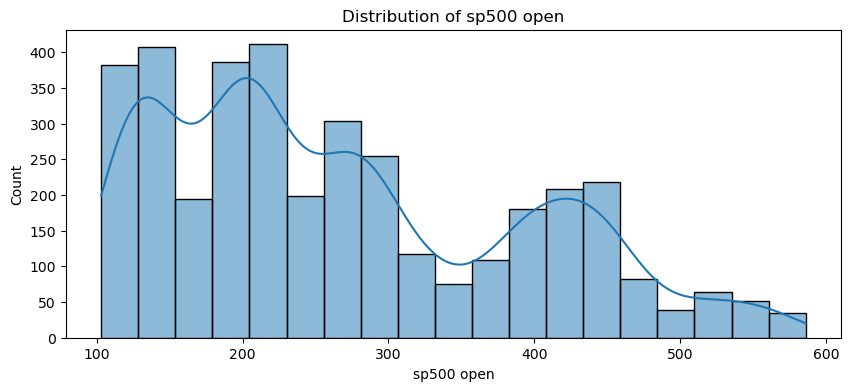

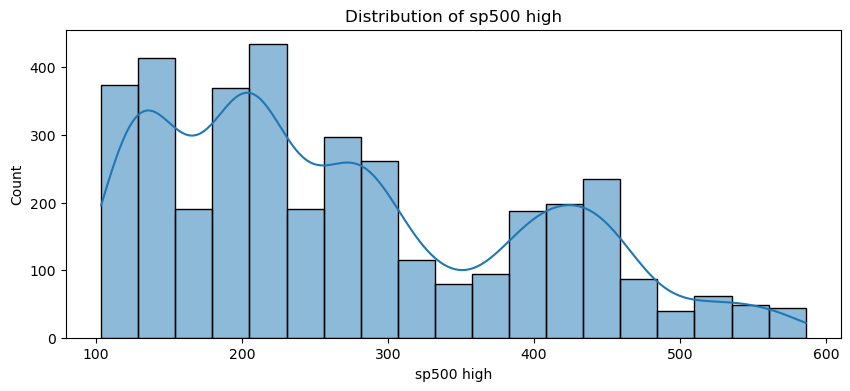

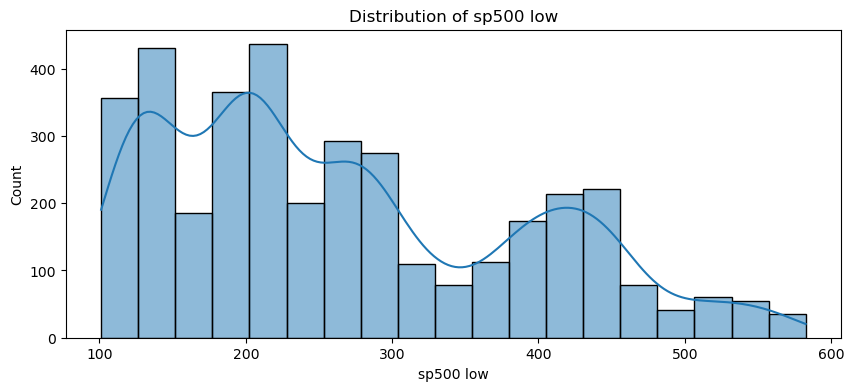

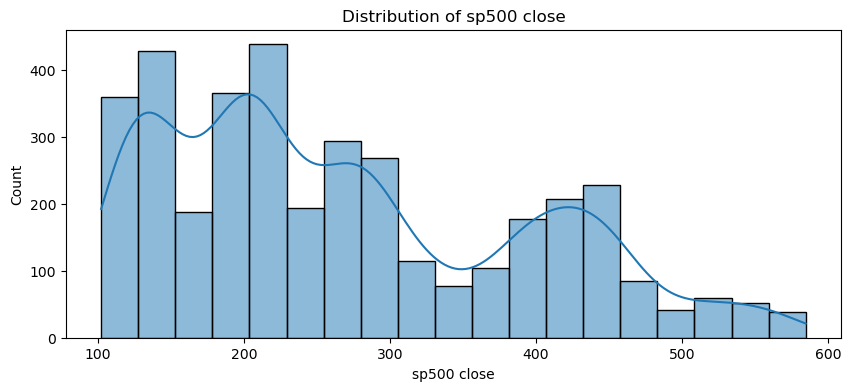

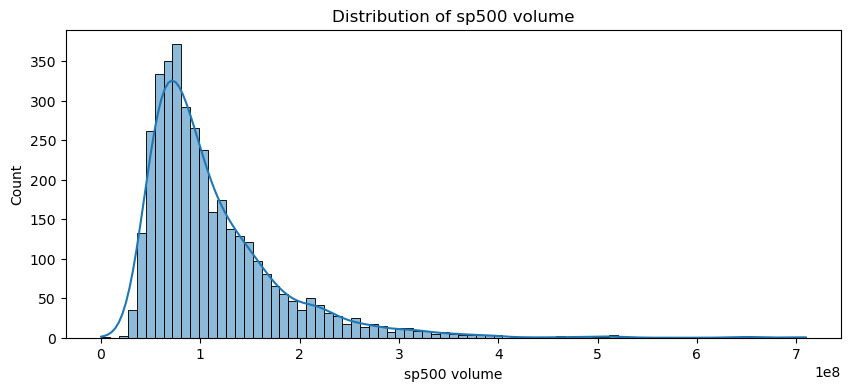

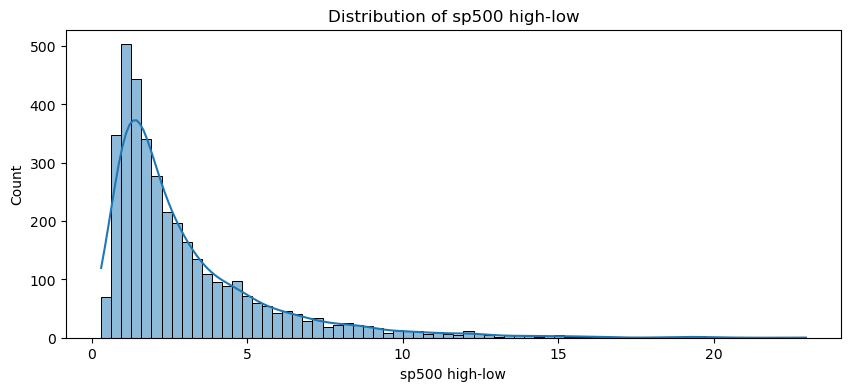

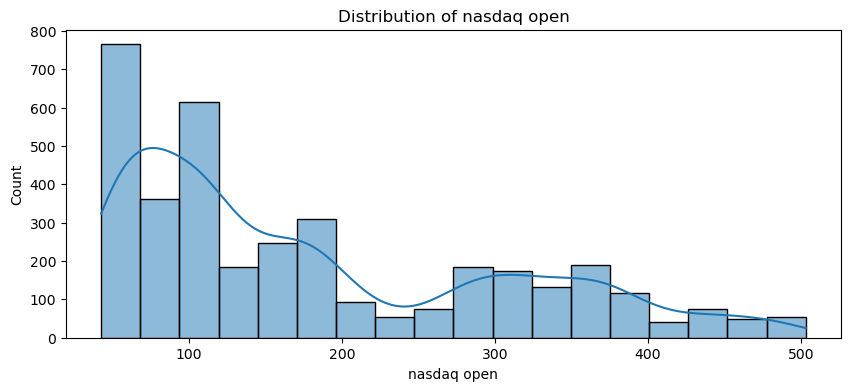

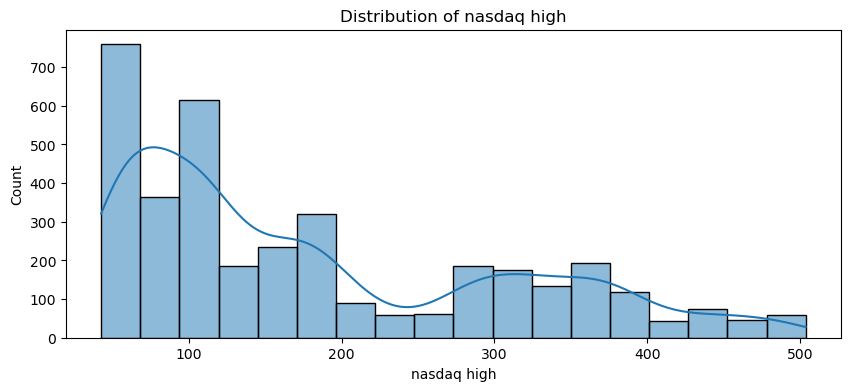

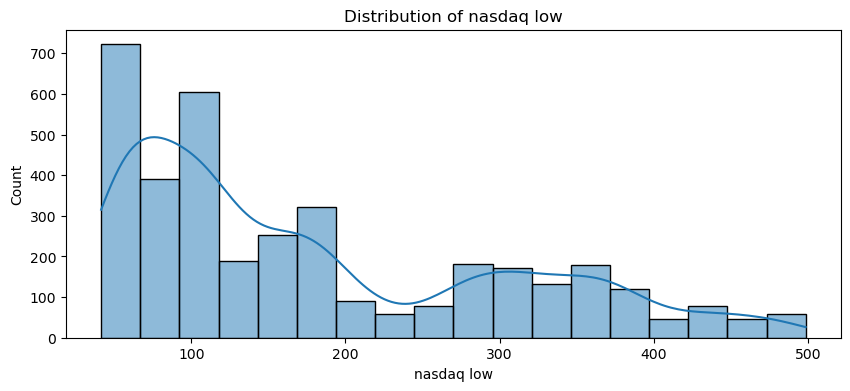

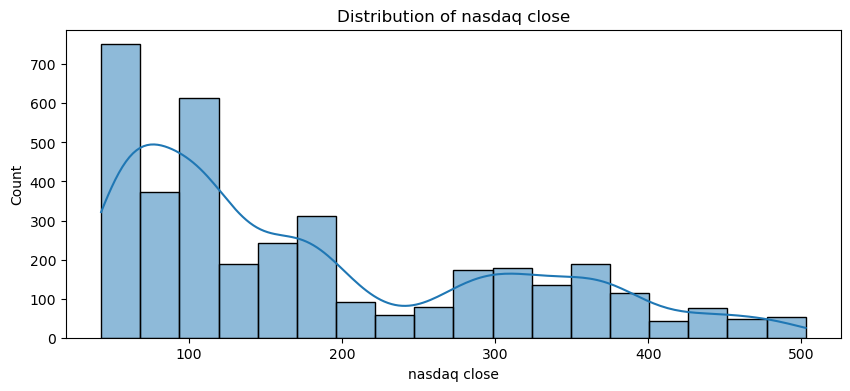

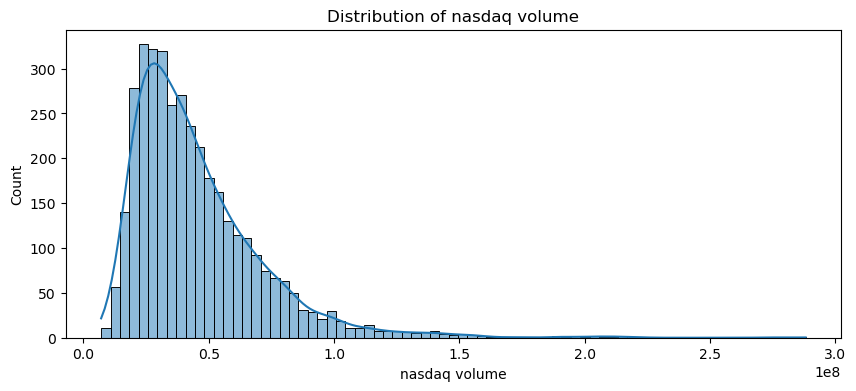

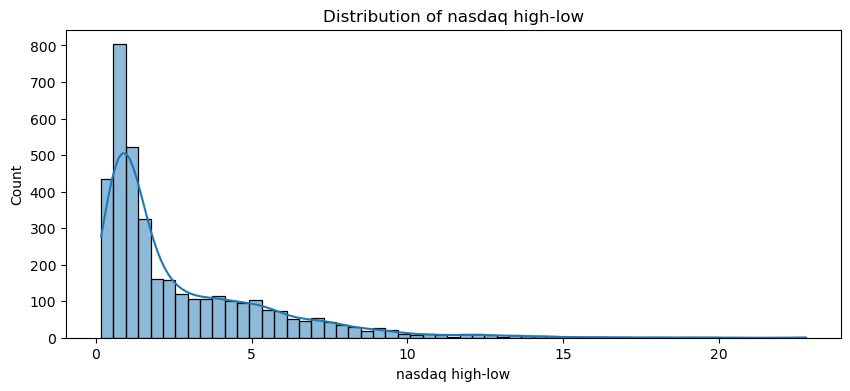

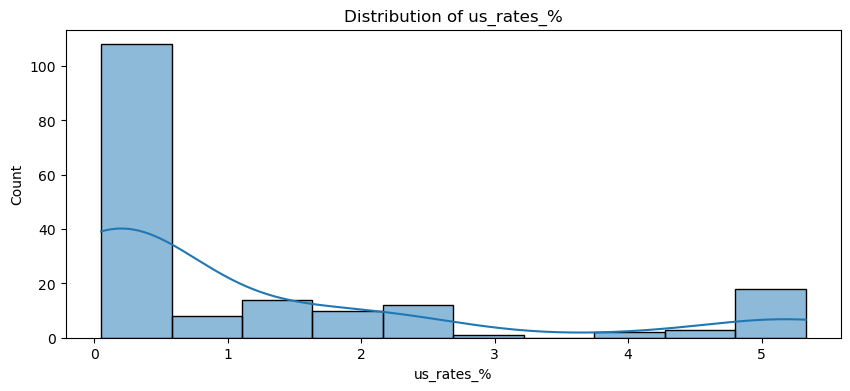

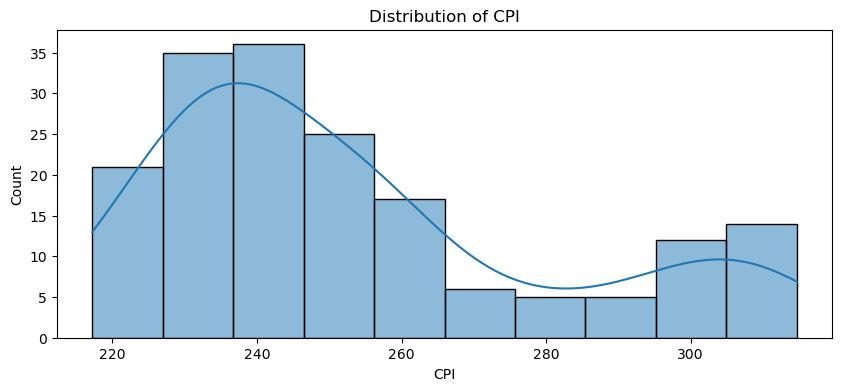

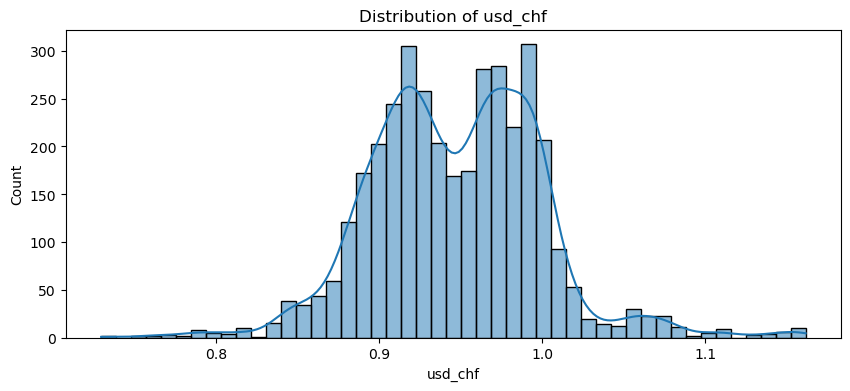

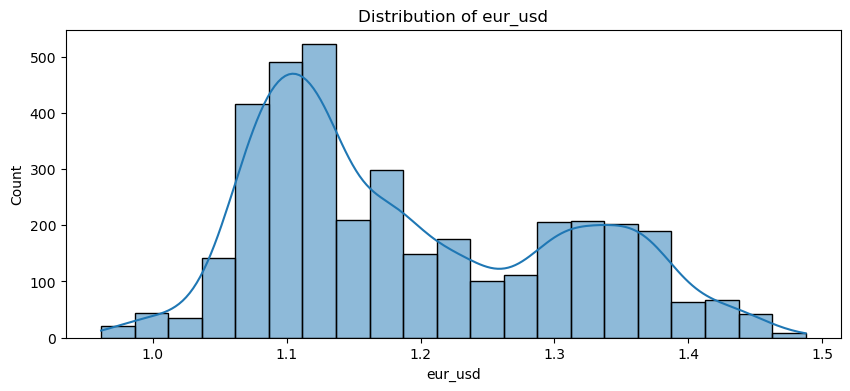

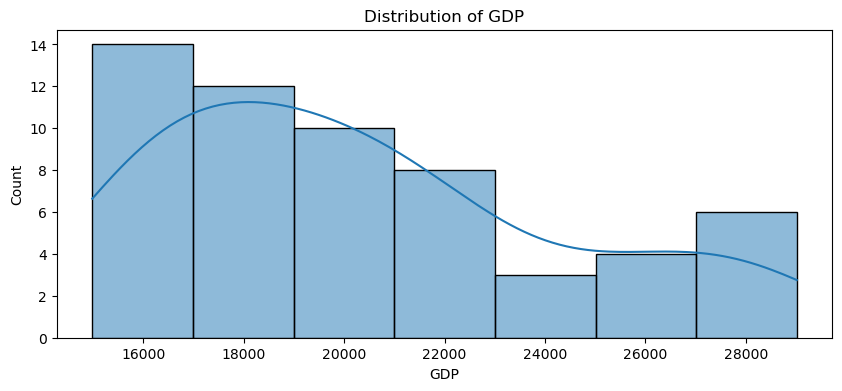

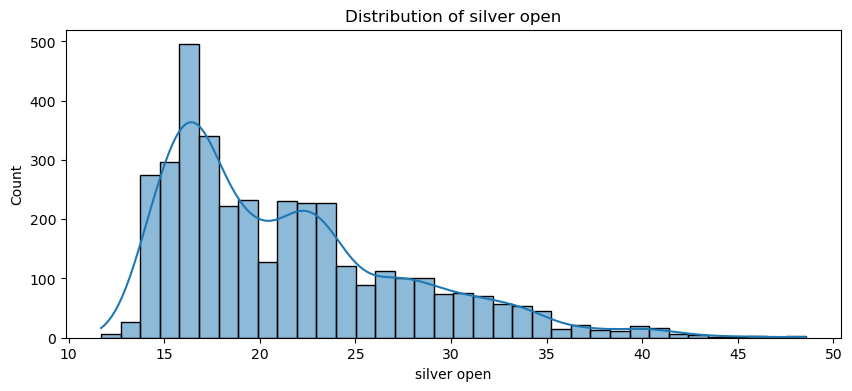

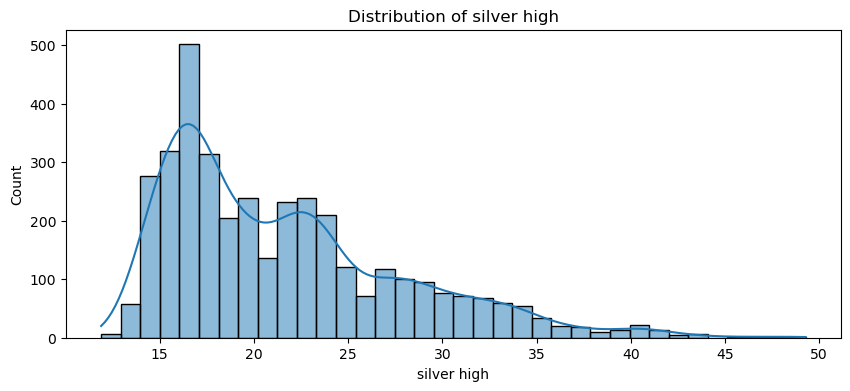

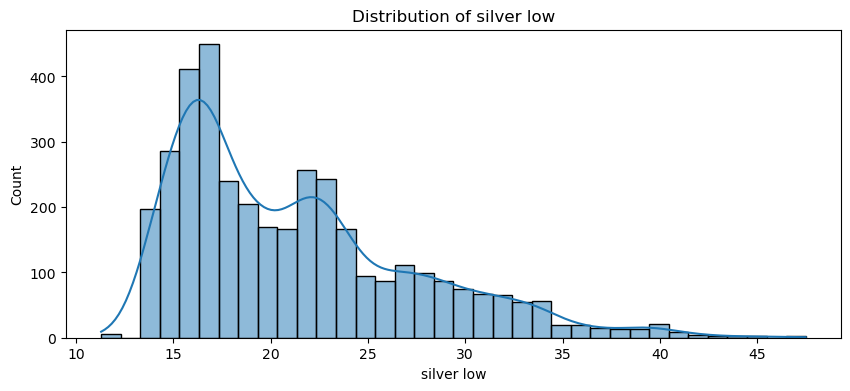

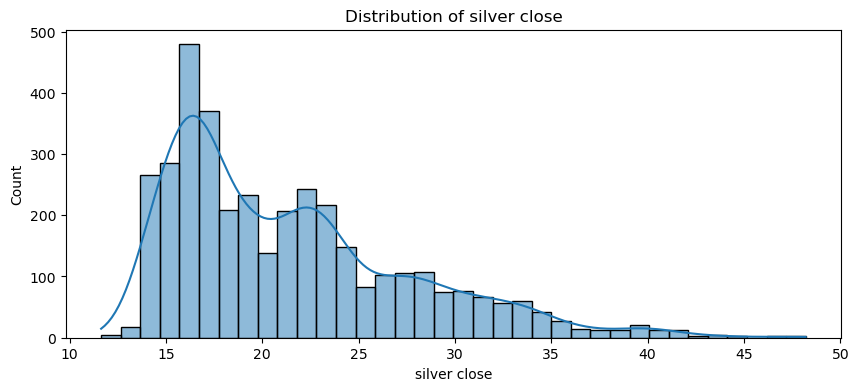

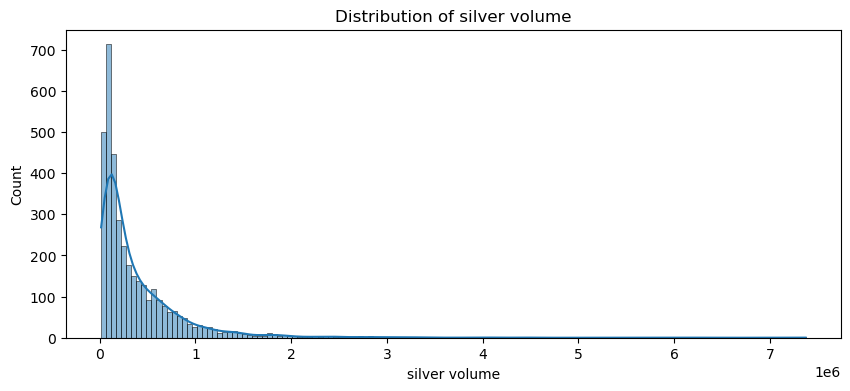

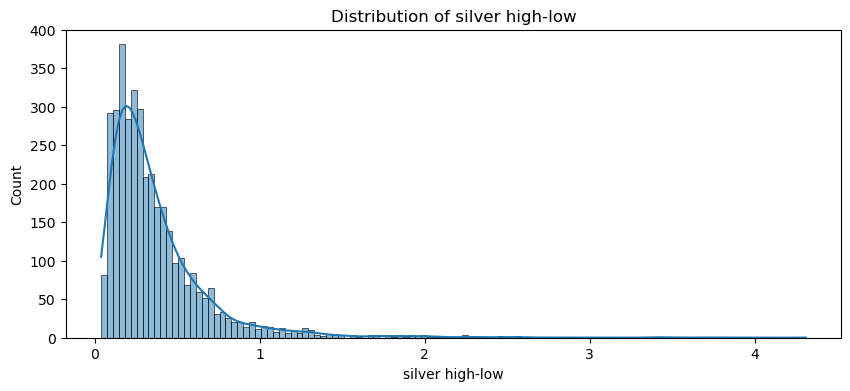

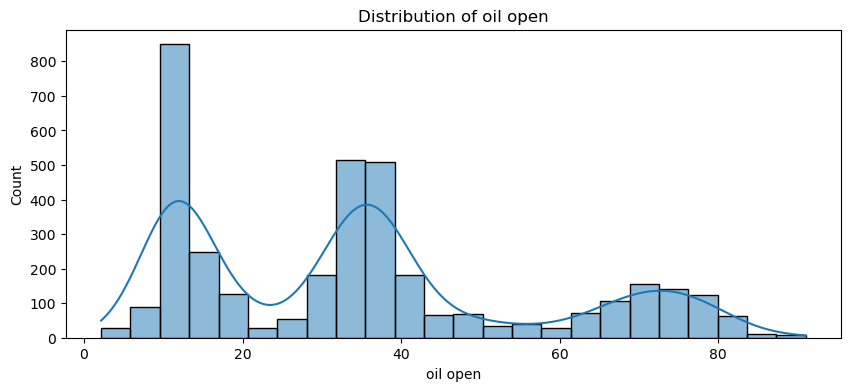

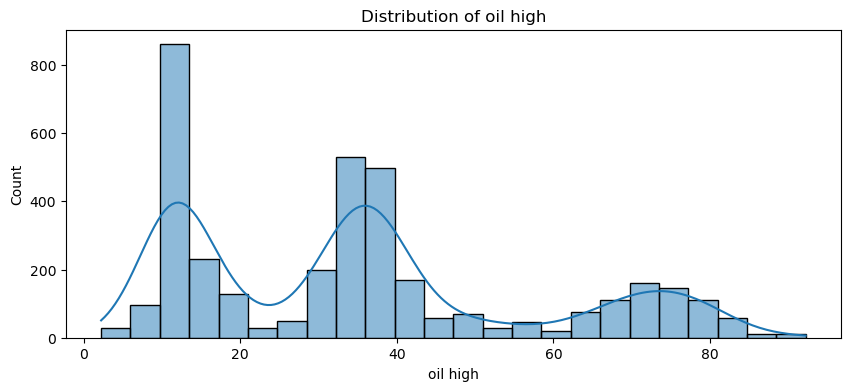

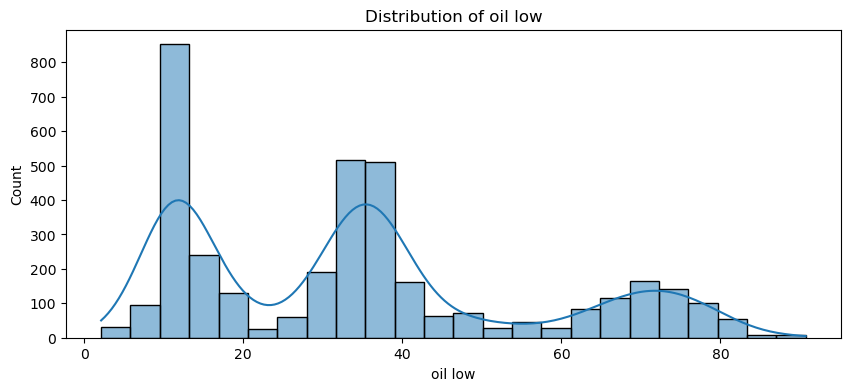

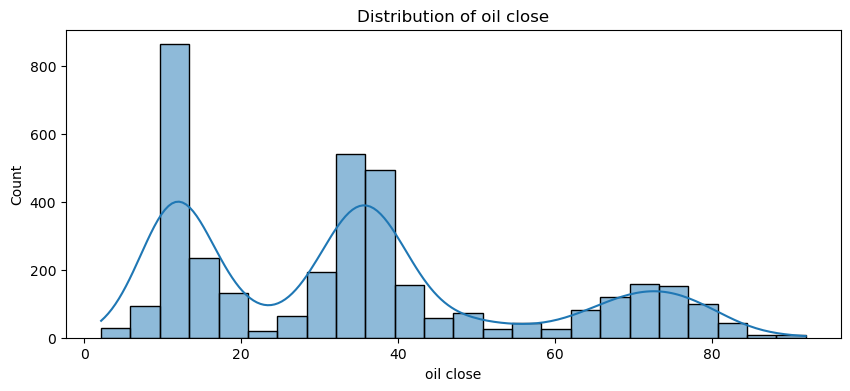

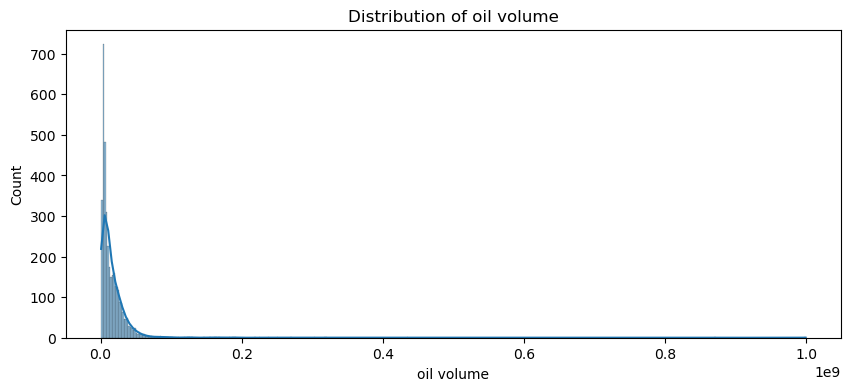

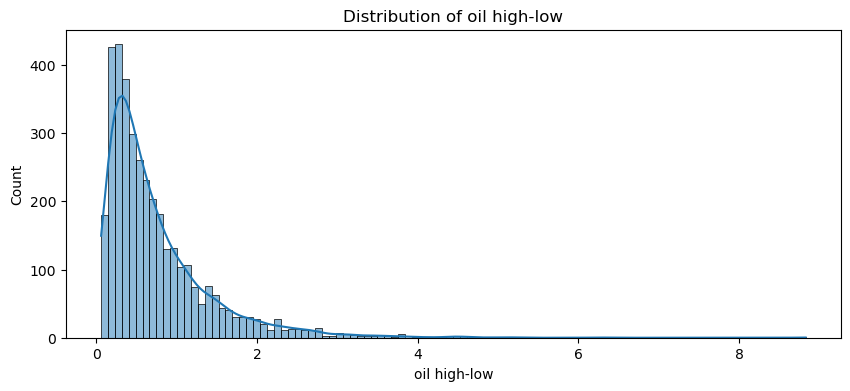

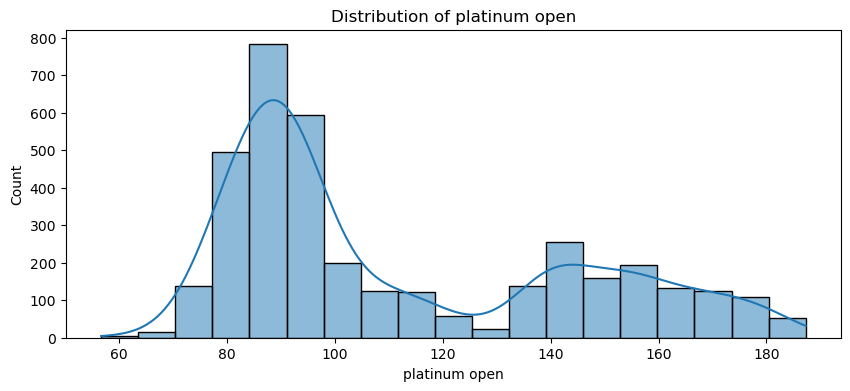

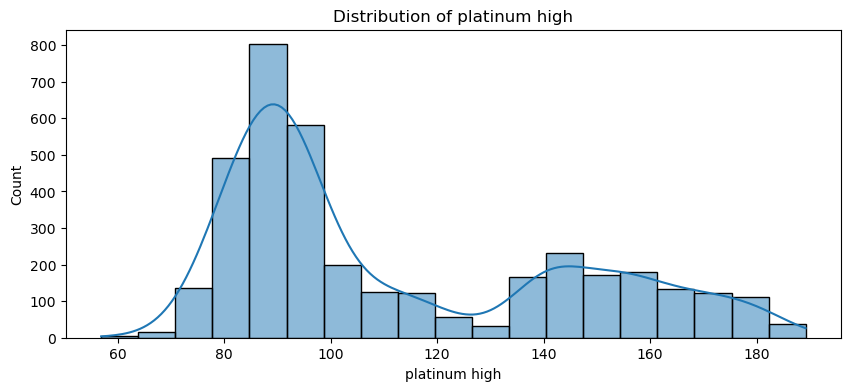

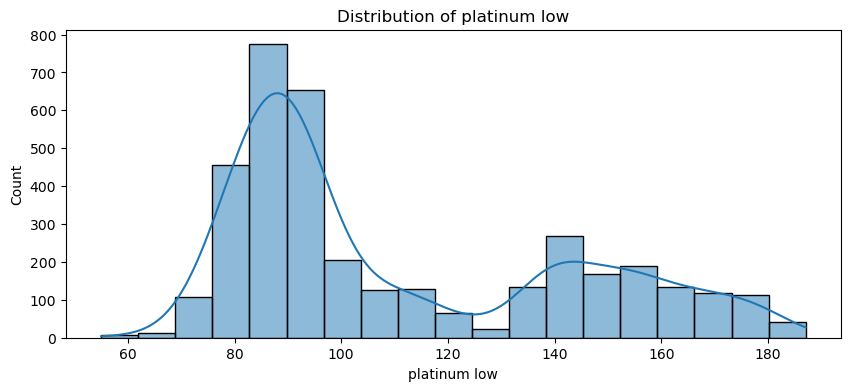

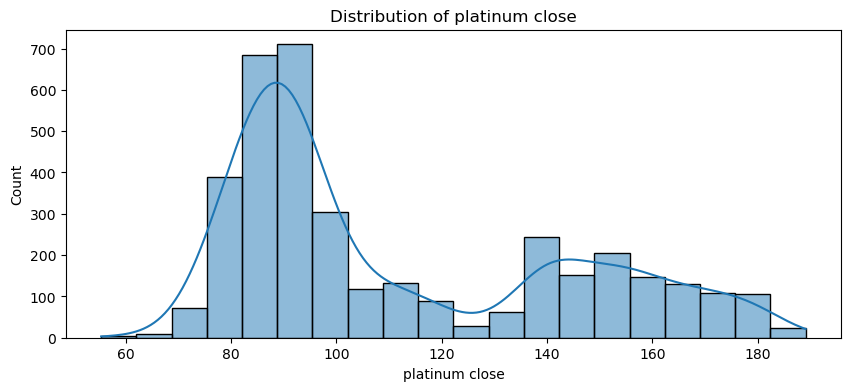

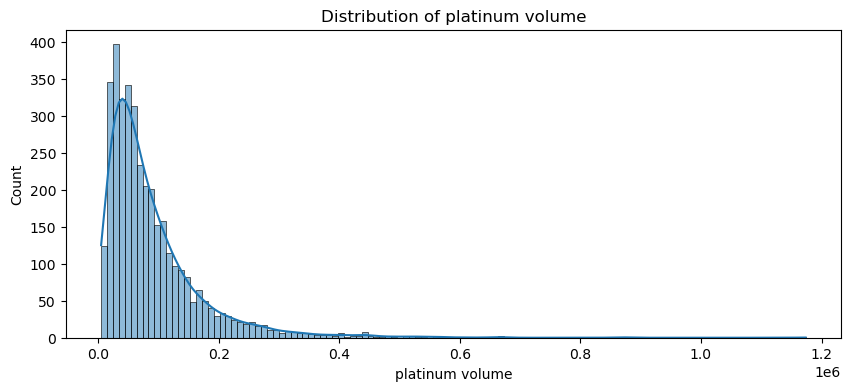

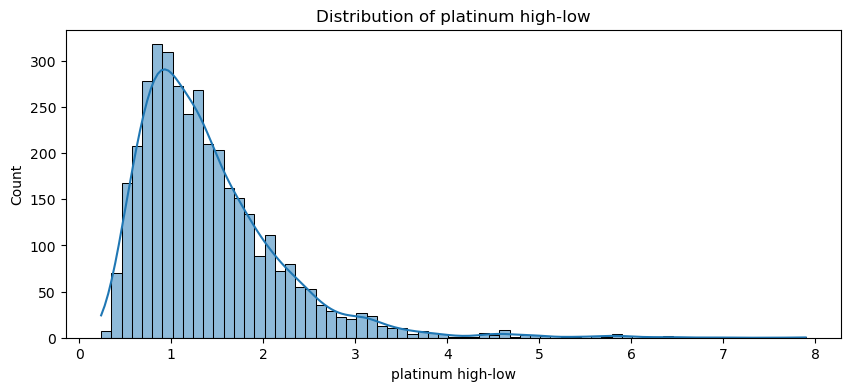

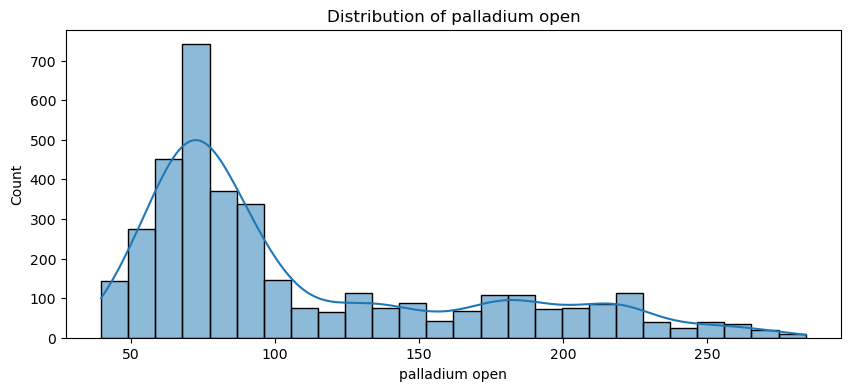

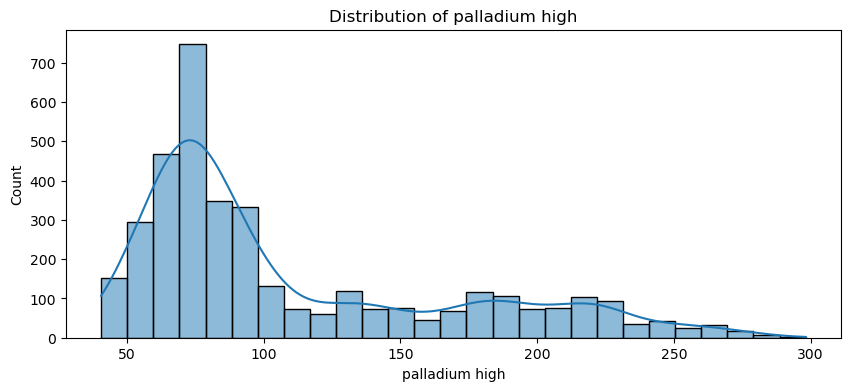

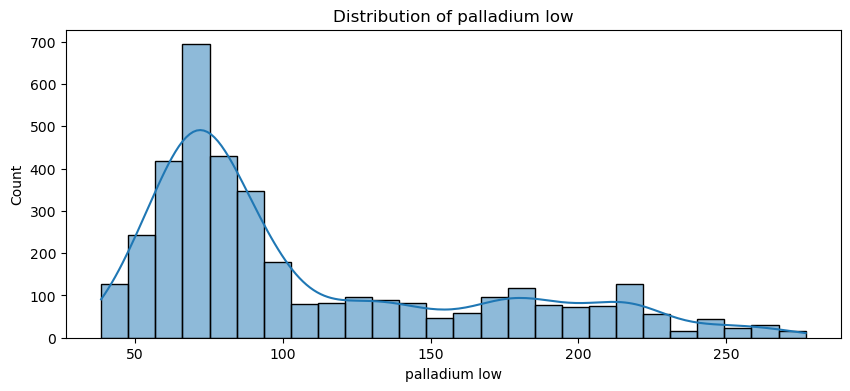

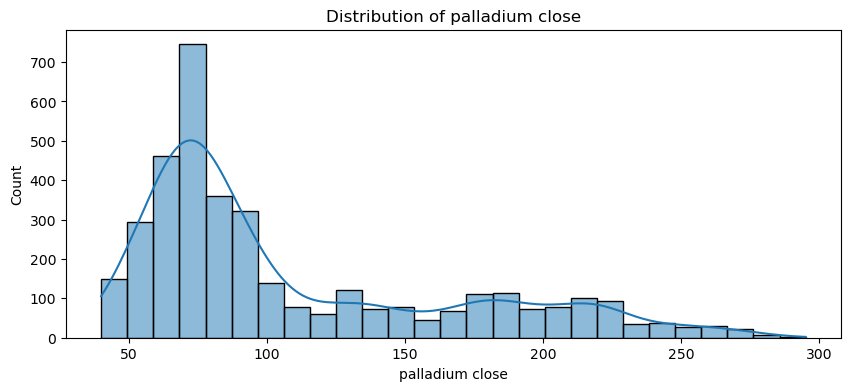

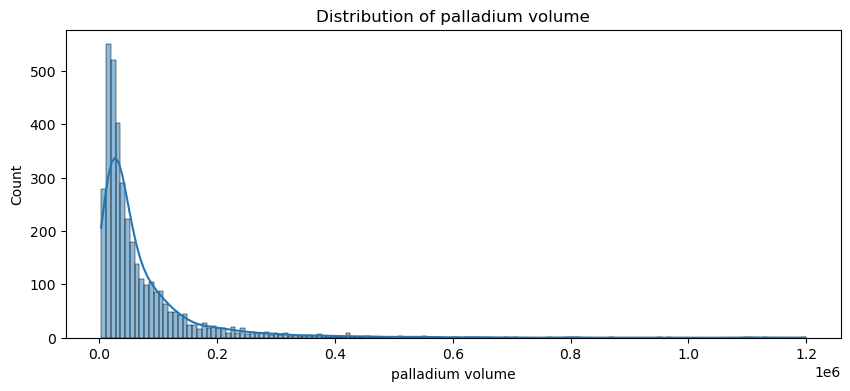

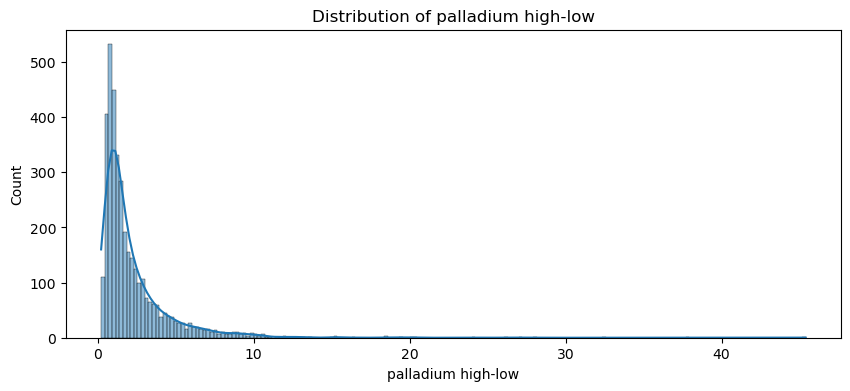

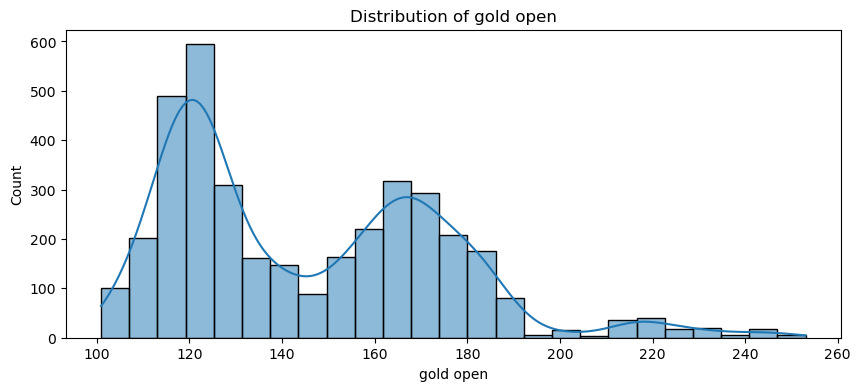

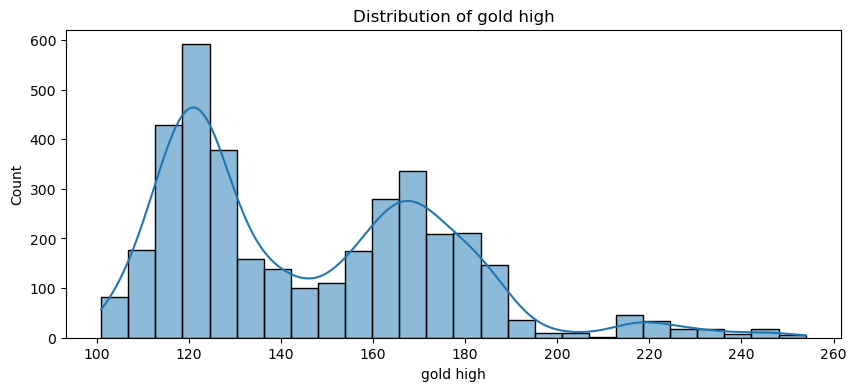

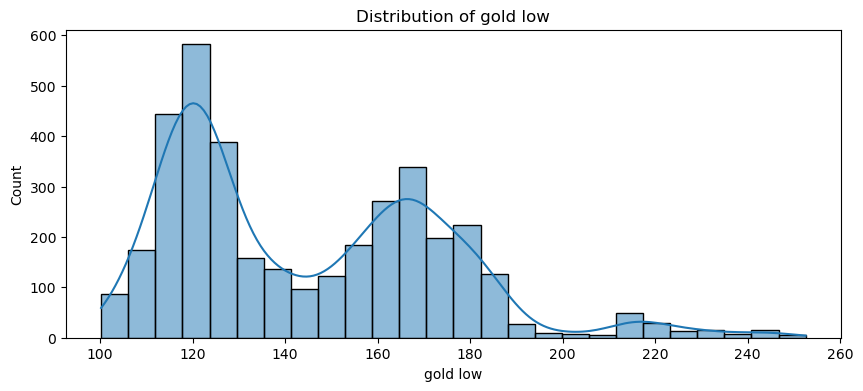

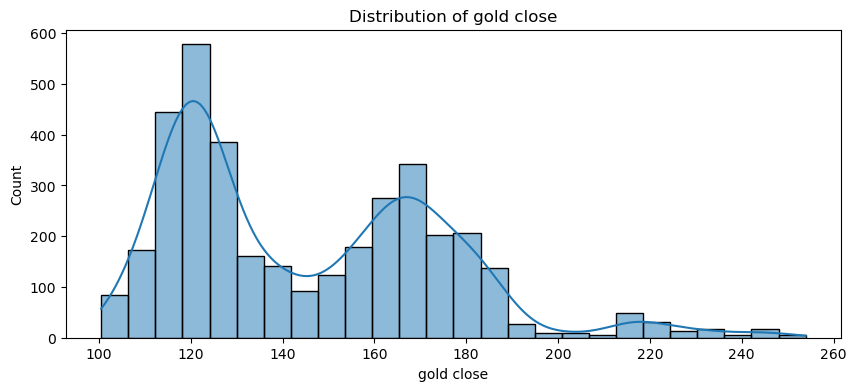

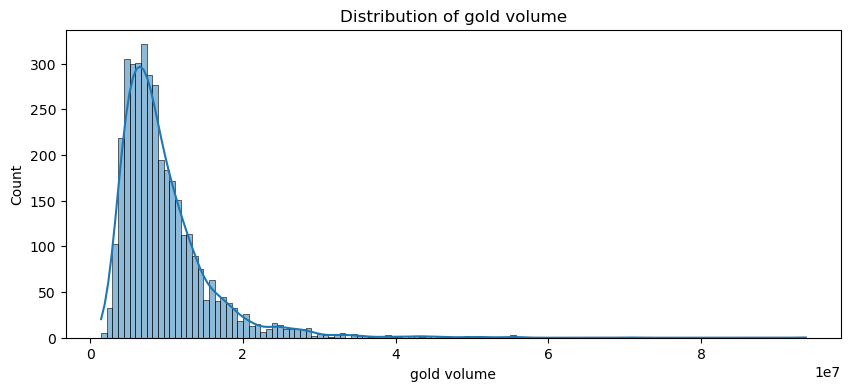

In [215]:
for i in num_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

In [216]:
df.corr(numeric_only=True)

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
sp500 open,1.000000,0.999916,0.999889,0.999810,-0.514871,0.513681,0.991532,0.991454,0.991491,0.991358,...,0.644674,0.644103,0.644019,-0.295577,0.412253,0.681216,0.679174,0.684501,0.681244,-0.283442
sp500 high,0.999916,1.000000,0.999823,0.999880,-0.511390,0.520522,0.991573,0.991627,0.991556,0.991538,...,0.646575,0.645874,0.645887,-0.295013,0.416337,0.681915,0.679919,0.685170,0.681964,-0.281198
sp500 low,0.999889,0.999823,1.000000,0.999898,-0.520291,0.504377,0.991320,0.991262,0.991461,0.991325,...,0.642729,0.642293,0.642185,-0.296271,0.408034,0.680457,0.678383,0.683810,0.680525,-0.286875
sp500 close,0.999810,0.999880,0.999898,1.000000,-0.516595,0.511622,0.991378,0.991433,0.991516,0.991548,...,0.644616,0.644060,0.644041,-0.295603,0.411877,0.681226,0.679190,0.684539,0.681309,-0.284437
sp500 volume,-0.514871,-0.511390,-0.520291,-0.516595,1.000000,0.142159,-0.467185,-0.464952,-0.470823,-0.468469,...,-0.320783,-0.329425,-0.325452,0.461173,-0.005533,-0.166782,-0.162057,-0.173572,-0.167480,0.582209
sp500 high-low,0.513681,0.520522,0.504377,0.511622,0.142159,1.000000,0.519660,0.524764,0.512485,0.517817,...,0.506002,0.493619,0.499144,-0.094053,0.590448,0.415688,0.418188,0.412921,0.414887,0.113734
nasdaq open,0.991532,0.991573,0.991320,0.991378,-0.467185,0.519660,1.000000,0.999929,0.999901,0.999811,...,0.645686,0.644569,0.644717,-0.249597,0.425092,0.738224,0.736407,0.741082,0.738189,-0.241723
nasdaq high,0.991454,0.991627,0.991262,0.991433,-0.464952,0.524764,0.999929,1.000000,0.999871,0.999896,...,0.647291,0.646068,0.646293,-0.249156,0.428455,0.738588,0.736806,0.741425,0.738573,-0.240090
nasdaq low,0.991491,0.991556,0.991461,0.991516,-0.470823,0.512485,0.999901,0.999871,1.000000,0.999915,...,0.644100,0.643081,0.643214,-0.249942,0.421907,0.737751,0.735915,0.740660,0.737749,-0.244035
nasdaq close,0.991358,0.991538,0.991325,0.991548,-0.468469,0.517817,0.999811,0.999896,0.999915,1.000000,...,0.645802,0.644698,0.644899,-0.249521,0.424877,0.738136,0.736326,0.741017,0.738153,-0.242344


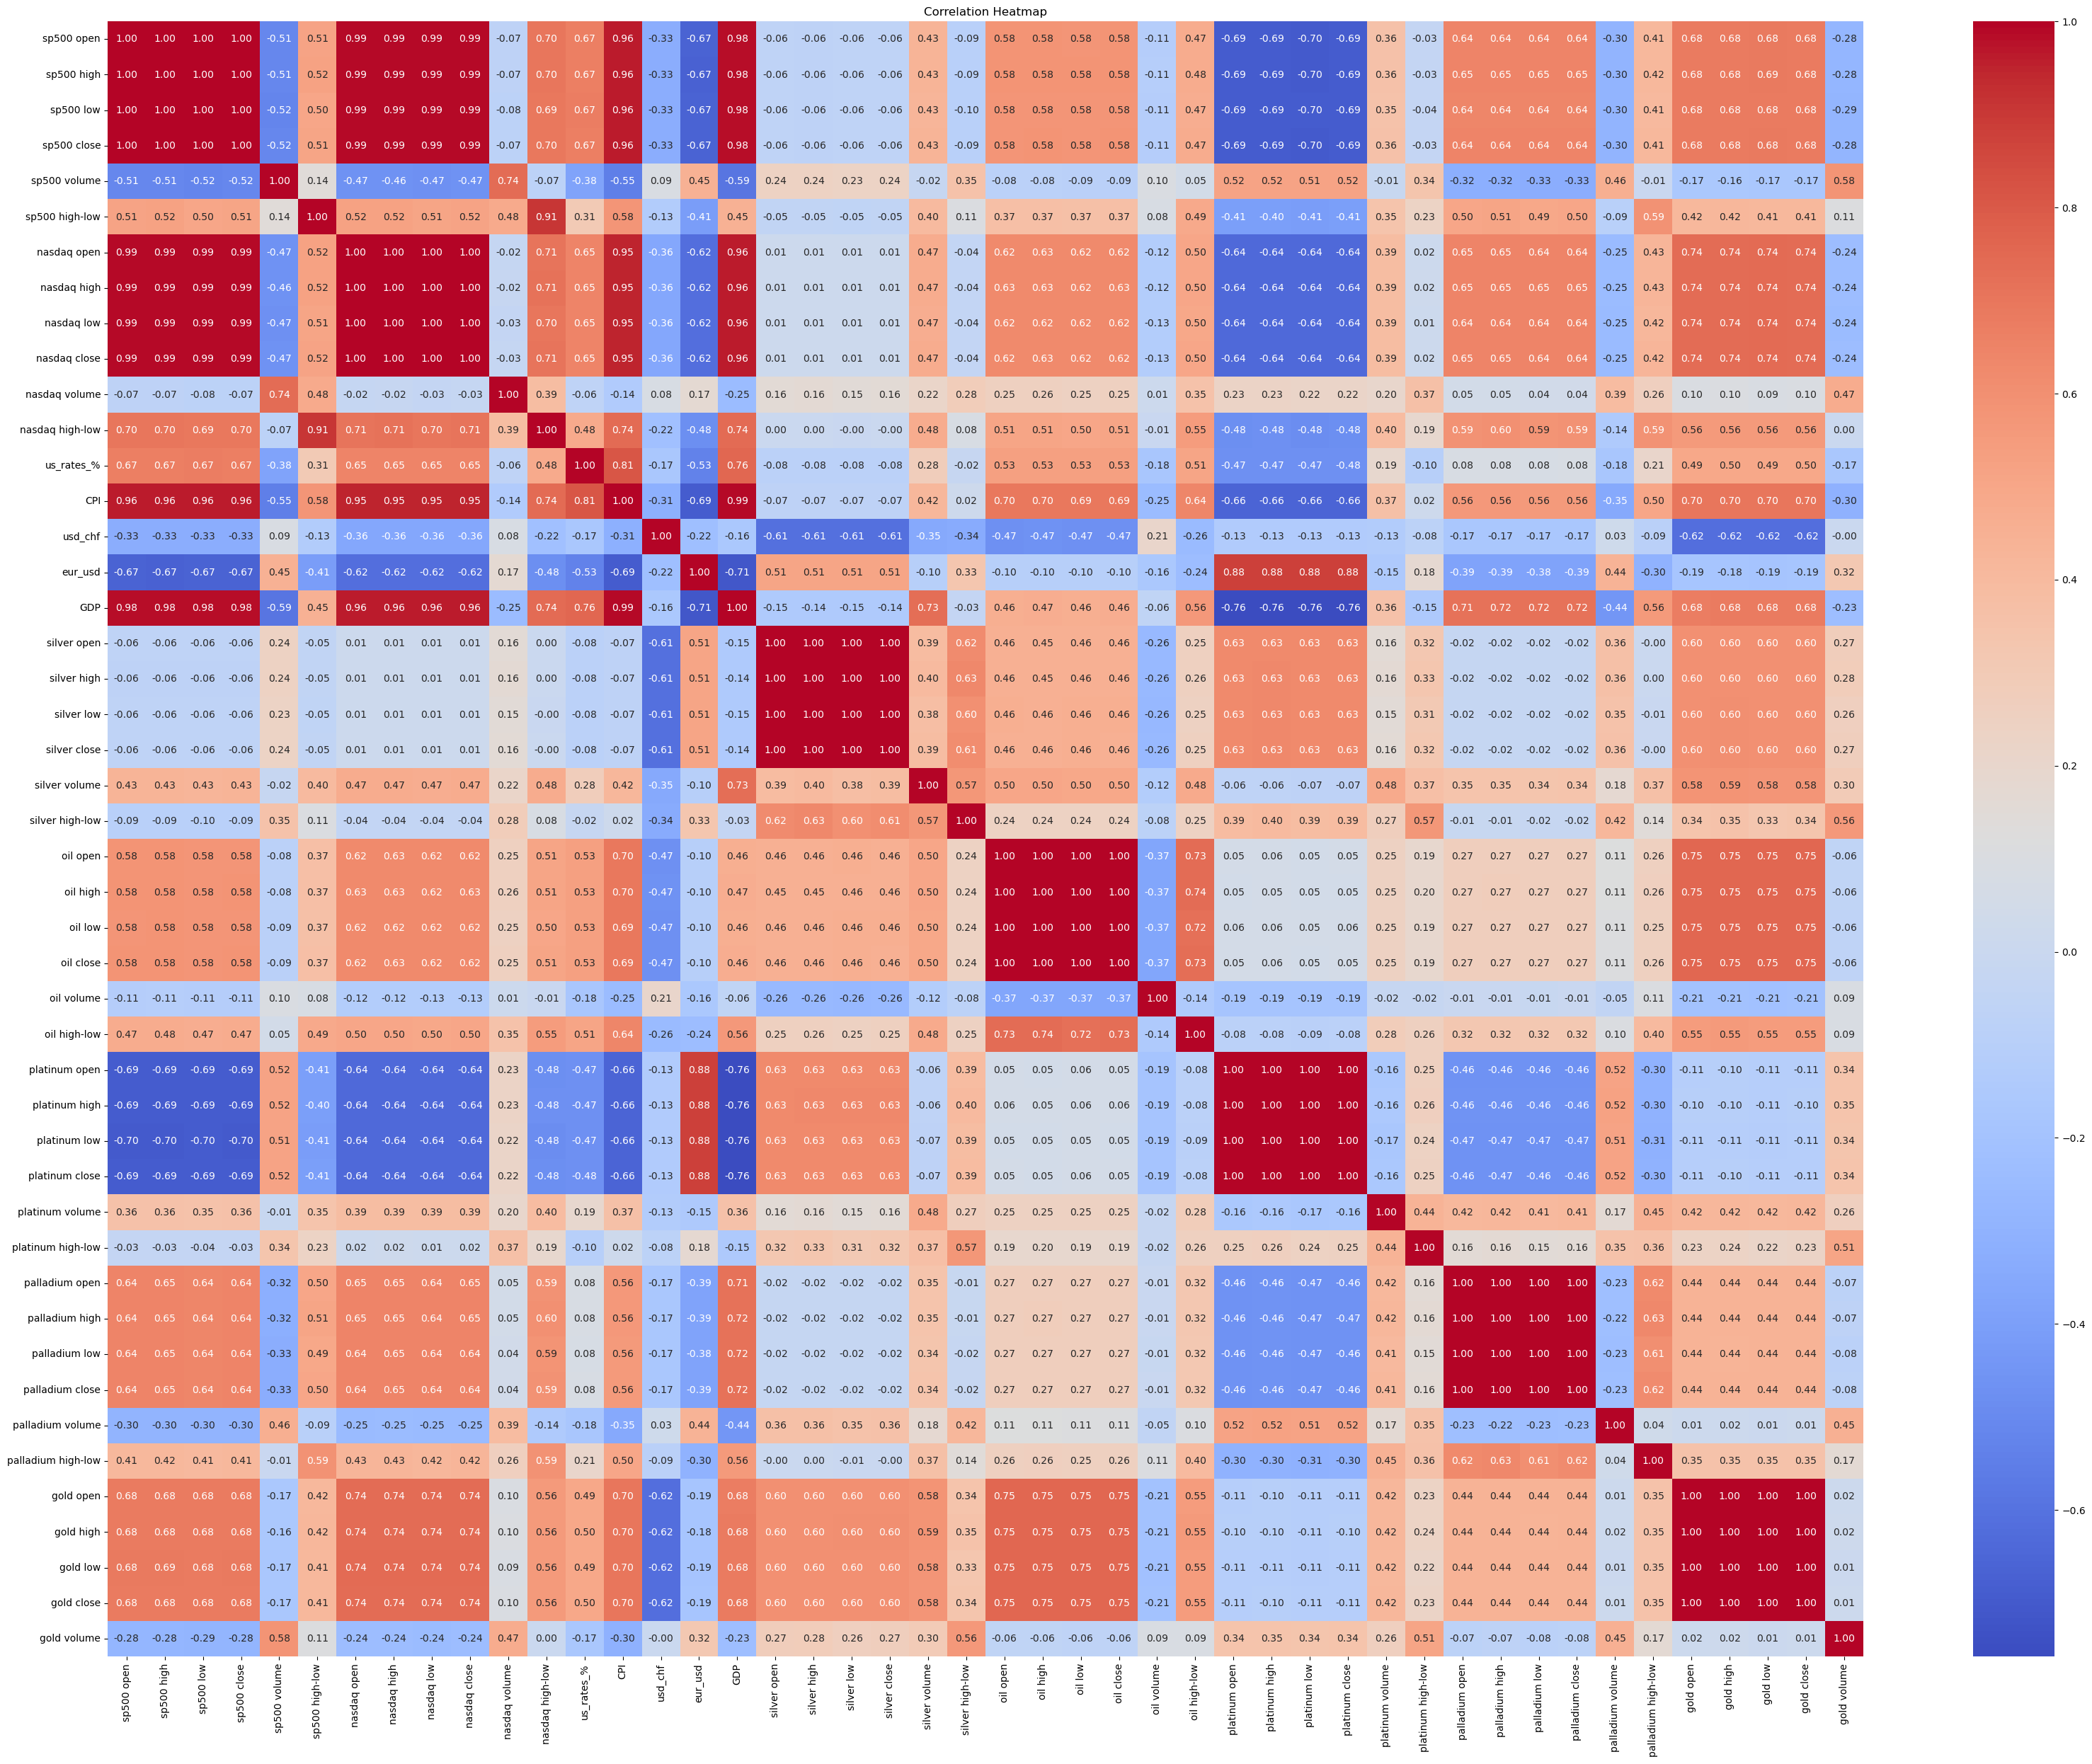

In [217]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [218]:
df['date'] = pd.to_datetime(df['date'])

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                3904 non-null   datetime64[ns]
 1   sp500 open          3719 non-null   float64       
 2   sp500 high          3719 non-null   float64       
 3   sp500 low           3719 non-null   float64       
 4   sp500 close         3719 non-null   float64       
 5   sp500 volume        3719 non-null   float64       
 6   sp500 high-low      3719 non-null   float64       
 7   nasdaq open         3719 non-null   float64       
 8   nasdaq high         3719 non-null   float64       
 9   nasdaq low          3719 non-null   float64       
 10  nasdaq close        3719 non-null   float64       
 11  nasdaq volume       3719 non-null   float64       
 12  nasdaq high-low     3719 non-null   float64       
 13  us_rates_%          176 non-null    float64     

In [220]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop(columns=['date'])

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sp500 open          3719 non-null   float64
 1   sp500 high          3719 non-null   float64
 2   sp500 low           3719 non-null   float64
 3   sp500 close         3719 non-null   float64
 4   sp500 volume        3719 non-null   float64
 5   sp500 high-low      3719 non-null   float64
 6   nasdaq open         3719 non-null   float64
 7   nasdaq high         3719 non-null   float64
 8   nasdaq low          3719 non-null   float64
 9   nasdaq close        3719 non-null   float64
 10  nasdaq volume       3719 non-null   float64
 11  nasdaq high-low     3719 non-null   float64
 12  us_rates_%          176 non-null    float64
 13  CPI                 176 non-null    float64
 14  usd_chf             3694 non-null   float64
 15  eur_usd             3694 non-null   float64
 16  GDP   

In [222]:
df.columns

Index(['sp500 open', 'sp500 high', 'sp500 low', 'sp500 close', 'sp500 volume',
       'sp500 high-low', 'nasdaq open', 'nasdaq high', 'nasdaq low',
       'nasdaq close', 'nasdaq volume', 'nasdaq high-low', 'us_rates_%', 'CPI',
       'usd_chf', 'eur_usd', 'GDP', 'silver open', 'silver high', 'silver low',
       'silver close', 'silver volume', 'silver high-low', 'oil open',
       'oil high', 'oil low', 'oil close', 'oil volume', 'oil high-low',
       'platinum open', 'platinum high', 'platinum low', 'platinum close',
       'platinum volume', 'platinum high-low', 'palladium open',
       'palladium high', 'palladium low', 'palladium close',
       'palladium volume', 'palladium high-low', 'gold open', 'gold high',
       'gold low', 'gold close', 'gold volume', 'year', 'month', 'day'],
      dtype='object')

In [223]:
df = df.fillna(df.mean(numeric_only=True))

In [224]:
df.isnull().sum().sum()

0

In [225]:
y = df['gold close']
X = df.drop(columns=['gold close'])

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [227]:
num_features = X_train.columns
num_features

Index(['sp500 open', 'sp500 high', 'sp500 low', 'sp500 close', 'sp500 volume',
       'sp500 high-low', 'nasdaq open', 'nasdaq high', 'nasdaq low',
       'nasdaq close', 'nasdaq volume', 'nasdaq high-low', 'us_rates_%', 'CPI',
       'usd_chf', 'eur_usd', 'GDP', 'silver open', 'silver high', 'silver low',
       'silver close', 'silver volume', 'silver high-low', 'oil open',
       'oil high', 'oil low', 'oil close', 'oil volume', 'oil high-low',
       'platinum open', 'platinum high', 'platinum low', 'platinum close',
       'platinum volume', 'platinum high-low', 'palladium open',
       'palladium high', 'palladium low', 'palladium close',
       'palladium volume', 'palladium high-low', 'gold open', 'gold high',
       'gold low', 'gold volume', 'year', 'month', 'day'],
      dtype='object')

In [228]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),
        num_features)
    ],
    remainder='passthrough'
)

In [229]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [230]:
X_test_scaled.shape

(781, 48)

In [231]:
X_train_df = pd.DataFrame(
    X_train_scaled,
    columns=num_features,
    index=X_train.index
)

X_test_df = pd.DataFrame(
    X_test_scaled,
    columns=num_features,
    index=X_test.index
)

In [232]:
X_test_df.head()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold volume,year,month,day
1896,-0.278767,-0.286775,-0.273001,-0.281414,-0.891662,-0.765364,-0.426183,-0.430051,-0.419492,-0.425251,...,-0.612277,-0.342301,-0.528008,-0.982272,-0.989296,-0.967244,-0.962566,0.004210,-1.029845,0.503155
2800,0.577017,0.568042,0.579350,0.579072,-1.099093,-0.213181,0.784824,0.785078,0.791093,0.797561,...,1.740450,-0.059729,1.739091,1.501251,1.478697,1.411229,1.136004,0.708572,0.444532,0.278644
1961,-0.230281,-0.240816,-0.227872,-0.231830,-0.410529,-0.704433,-0.367038,-0.374697,-0.367356,-0.372209,...,-0.463950,-0.526296,-0.570601,-0.911778,-0.923820,-0.896507,-0.546747,0.004210,-0.145219,0.054133
2102,-0.018087,-0.030010,-0.008431,-0.018715,-1.003182,-0.982429,-0.213780,-0.222817,-0.207841,-0.216764,...,-0.127362,-0.540196,-0.476819,-0.791869,-0.806272,-0.781103,-0.666765,0.004210,1.624034,1.401198
1539,-0.528128,-0.528416,-0.520573,-0.519701,-0.540948,-0.624462,-0.582453,-0.585476,-0.578401,-0.580277,...,-0.918558,-0.533670,-0.686763,-1.439099,-1.434226,-1.430773,-0.885640,-0.465364,1.329158,-0.619400


In [233]:
knn = KNeighborsRegressor(
    n_neighbors=3,
    weights='distance',
    metric='minkowski' 
)

knn.fit(X_train_df, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [234]:
y_pred = knn.predict(X_test_df)

In [235]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [236]:
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)

MSE : 7.531709666287442
RMSE: 2.744396047637338
MAE : 1.7110639024589105
R2  : 0.9908153032232805


In [237]:
print("Train R2:", knn.score(X_train_df, y_train))
print("Test  R2:", knn.score(X_test_df, y_test))

Train R2: 0.9999999999999999
Test  R2: 0.9908153032232805
